# Proyecto Final Parte 1: Modelo de predicción para la suscripción de clientes mediante MLP

## Parte 2: https://github.com/an3iitho/STATISTICAL_LEARNING/blob/master/Proyecto_Statistical_Learning_II/Parte2_CNN.ipynb

## Parte 3: https://github.com/an3iitho/STATISTICAL_LEARNING/blob/master/Proyecto_Statistical_Learning_II/Parte3_RNN.ipynb

## Álvaro Andrés Esquivel Gómez 11002822

### Planteamiento del problema
Los datos utilizados en este ejercicio están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo fijo (variable y). Para realizar dicha predicción se cuentan con 20 variables relacionadas a los clientes con datos numéricos y categóricos, los cuales se describen a continuación:




#### Variables de entrada:
##### Datos del cliente bancario:
1. edad (numérico)
2. trabajo: tipo de trabajo (categórico: 'admin.', 'Obrero', 'emprendedor', 'empleada doméstica', 'gerencia', 'jubilado', 'autónomo', 'servicios', 'estudiante' , 'técnico', 'desempleado', 'desconocido')
3. marital: estado civil (categórico: 'divorciado', 'casado', 'soltero', 'desconocido'; nota: 'divorciado' significa divorciado o viudo)
4. educación (categórica: 'básico.4y', 'básico.6y', 'básico.9y', 'escuela secundaria', 'analfabeto', 'curso.profesional', 'título universitario', 'desconocido')
5. incumplimiento: ¿tiene crédito en incumplimiento? (categórico: 'no', 'sí', 'desconocido')
6. vivienda: ¿tiene préstamo para vivienda? (categórico: 'no', 'sí', 'desconocido')
7. préstamo: ¿tiene préstamo personal? (categórico: 'no', 'sí', 'desconocido')
##### Relacionado con el último contacto de la campaña actual:
8. contacto: tipo de comunicación de contacto (categórico: 'celular', 'teléfono')
9. mes: último mes de contacto del año (categórico: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: último día de contacto de la semana (categórico: 'lun', 'tue', 'mié', 'jue', 'vie')
11. duración: duración del último contacto, en segundos (numérico). 
##### Otros atributos:
12. campaña: número de contactos realizados durante esta campaña y para este cliente 
13. pdays: número de días que pasaron después de que el cliente fue contactado por última vez 
14. anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)
15. poutcome: resultado de la campaña de marketing anterior (categórico: 'fracaso', 'inexistente', 'éxito')
##### Atributos del contexto social y económico
16. tasa de variación emp .: tasa de variación del empleo - indicador trimestral (numérico)
17. cons.price.idx: índice de precios al consumidor - indicador mensual (numérico)
18. cons.conf.idx: índice de confianza del consumidor - indicador mensual (numérico)
19. euribor3m: tipo de interés euribor a 3 meses - indicador diario (numérico)
20. número de empleados: número de empleados - indicador trimestral (numérico)

#### Variable de salida (objetivo deseado):
21. y - ¿el cliente ha suscrito un depósito a plazo? (binario: 'sí', 'no')

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
#Carga de datos
df = pd.read_csv('datasets_4471_6849_bank.csv')

## Análisis de datos

In [3]:
#Dataframe 
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [5]:
print("job", df.job.unique(), "\n\n", "marital", df.marital.unique(), "\n\n", 
      "education", df.education.unique(), "\n\n", "default", df.default.unique(), "\n\n", 
      "balance", df.balance.unique(), "\n\n", "housing", df.housing.unique(), "\n\n", 
      "loan", df.loan.unique(), "\n\n", "contact", df.contact.unique(), "\n\n", 
      "day", df.day.unique(), "\n\n", "month", df.month.unique(), "\n\n", 
      "poutcome", df.poutcome.unique(), "\n\n", "deposit", df.deposit.unique(), "\n\n")

job ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student'] 

 marital ['married' 'single' 'divorced'] 

 education ['secondary' 'tertiary' 'primary' 'unknown'] 

 default ['no' 'yes'] 

 balance [2343   45 1270 ... 1594 2593 -134] 

 housing ['yes' 'no'] 

 loan ['no' 'yes'] 

 contact ['unknown' 'cellular' 'telephone'] 

 day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31] 

 month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

 poutcome ['unknown' 'other' 'failure' 'success'] 

 deposit ['yes' 'no'] 




In [6]:
#Valores ducplicados
print(df.duplicated().sum())
#Valores nulos
print(df.isnull().sum())

0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [7]:
#Eliminacion de duracion de la llamada
#df.drop("duration",axis=1, inplace=True)

#Estadisticas de valores numericos
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


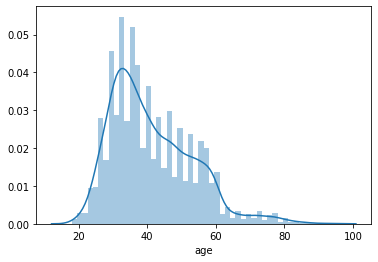

In [8]:
ax = sns.distplot(df.age)

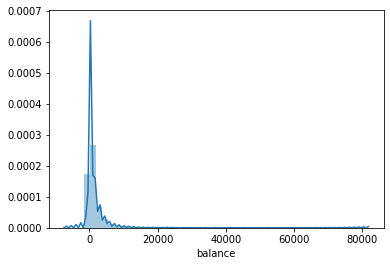

In [9]:
ax = sns.distplot(df.balance)

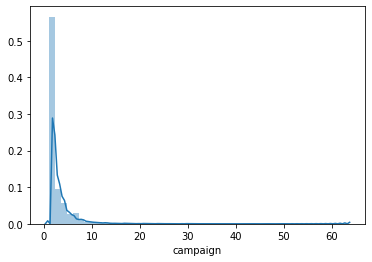

In [10]:
ax = sns.distplot(df.campaign)

In [11]:
#Balance de variables a predecir
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [12]:
#Realizando Label Encoding a la variable a predecir deposit

# Transformacion de varible deposit a categorica
df['deposit'] = df['deposit'].astype('category')
# Asigno un numero a la variable categorica a definir
df['deposit'] = df['deposit'].cat.codes
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


In [13]:
#Valores numericos
val_numericos = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
val_numericos.describe()


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [14]:
#Normalizacion de variables numericas

normalized_data = (val_numericos - val_numericos.min())/(val_numericos.max() - val_numericos.min())
normalized_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,0.301714,0.095121,0.488601,0.095384,0.024329,0.061205,0.014354
std,0.154719,0.036631,0.280691,0.089489,0.043904,0.127203,0.039517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.079147,0.233333,0.035061,0.000000,0.000000,0.000000
50%,0.272727,0.084008,0.466667,0.065223,0.016129,0.000000,0.000000
75%,0.402597,0.097160,0.700000,0.127352,0.032258,0.025439,0.017241
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#Reordenar el dataframe
df = df.drop(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], axis=1)
df = normalized_data.join(df)
df

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,0.532468,0.104371,0.133333,0.268110,0.000000,0.000000,0.000000,admin.,married,secondary,no,yes,no,unknown,may,unknown,1
1,0.493506,0.078273,0.133333,0.377675,0.000000,0.000000,0.000000,admin.,married,secondary,no,no,no,unknown,may,unknown,1
2,0.298701,0.092185,0.133333,0.357566,0.000000,0.000000,0.000000,technician,married,secondary,no,yes,no,unknown,may,unknown,1
3,0.480519,0.105882,0.133333,0.148750,0.000000,0.000000,0.000000,services,married,secondary,no,yes,no,unknown,may,unknown,1
4,0.467532,0.079851,0.133333,0.172983,0.016129,0.000000,0.000000,admin.,married,tertiary,no,no,no,unknown,may,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.194805,0.077773,0.633333,0.065739,0.000000,0.000000,0.000000,blue-collar,single,primary,no,yes,no,cellular,apr,unknown,0
11158,0.272727,0.086086,0.500000,0.020882,0.048387,0.000000,0.000000,services,married,secondary,no,no,no,unknown,jun,unknown,0
11159,0.181818,0.078091,0.600000,0.039701,0.016129,0.000000,0.000000,technician,single,secondary,no,no,no,cellular,aug,unknown,0
11160,0.324675,0.077762,0.233333,0.001805,0.016129,0.202339,0.086207,technician,married,secondary,no,no,yes,cellular,may,failure,0


In [16]:
#Transformacion de variables categoricas a numericas mediante one-hot
data = pd.get_dummies(df)

In [17]:
data

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.532468,0.104371,0.133333,0.268110,0.000000,0.000000,0.000000,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0.493506,0.078273,0.133333,0.377675,0.000000,0.000000,0.000000,1,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0.298701,0.092185,0.133333,0.357566,0.000000,0.000000,0.000000,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.480519,0.105882,0.133333,0.148750,0.000000,0.000000,0.000000,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.467532,0.079851,0.133333,0.172983,0.016129,0.000000,0.000000,1,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.194805,0.077773,0.633333,0.065739,0.000000,0.000000,0.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,1
11158,0.272727,0.086086,0.500000,0.020882,0.048387,0.000000,0.000000,0,0,0,...,1,0,0,0,0,0,0,0,0,1
11159,0.181818,0.078091,0.600000,0.039701,0.016129,0.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,0.324675,0.077762,0.233333,0.001805,0.016129,0.202339,0.086207,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [18]:
#Separ las varibles
dataX = data.drop(['deposit'], axis=1)
dataY = data['deposit']

In [19]:
dataX

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.532468,0.104371,0.133333,0.268110,0.000000,0.000000,0.000000,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.493506,0.078273,0.133333,0.377675,0.000000,0.000000,0.000000,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.298701,0.092185,0.133333,0.357566,0.000000,0.000000,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.480519,0.105882,0.133333,0.148750,0.000000,0.000000,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.467532,0.079851,0.133333,0.172983,0.016129,0.000000,0.000000,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.194805,0.077773,0.633333,0.065739,0.000000,0.000000,0.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,1
11158,0.272727,0.086086,0.500000,0.020882,0.048387,0.000000,0.000000,0,0,0,...,1,0,0,0,0,0,0,0,0,1
11159,0.181818,0.078091,0.600000,0.039701,0.016129,0.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,0.324675,0.077762,0.233333,0.001805,0.016129,0.202339,0.086207,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [20]:
dataY

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int8

In [21]:
#Split de datos test - train
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.33, random_state=42)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7478, 51), (3684, 51), (7478,), (3684,))

In [23]:
print("y_train\n", y_train.value_counts(), "\ny_test\n", y_test.value_counts())

y_train
 0    3956
1    3522
Name: deposit, dtype: int64 
y_test
 0    1917
1    1767
Name: deposit, dtype: int64


In [24]:
#Split de datos test - val
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=10)

In [25]:
X_test.shape, X_val.shape, y_test.shape, y_val.shape

((1842, 51), (1842, 51), (1842,), (1842,))

In [26]:
print("y_test\n", y_test.value_counts(), "\ny_val\n", y_val.value_counts())

y_test
 0    942
1    900
Name: deposit, dtype: int64 
y_val
 0    975
1    867
Name: deposit, dtype: int64


## Creación del modelo MLP para la prediccion de datos

Se utiliza la siguiente arquitectura:
1. Una capa de entrada con 30 neuronas con función de activación tangente hiperbólica
2. Primera capa oculta de 20 neuronas con función de activación tangente hiperbólica
3. Segunda capa oculta de 10 neuronas con función de activación tangente hiperbólica
3. Tercera capa oculta de 5 neuronas con función de activación tangente hiperbólica
4. Capa salida con una neurona con función de activacion sigmoid para determinar la probabilidad de la variable a predecir


El modelo utiliza como función loss binary crossentropy, Adam como algoritmo de optimización y métrica de rendimiento accuracy.


In [27]:
modelo = keras.models.Sequential()
modelo.add(keras.layers.Dense(30, input_dim=51, activation="tanh"))
modelo.add(keras.layers.Dense(20, activation="tanh"))
modelo.add(keras.layers.Dense(10, activation="tanh"))
modelo.add(keras.layers.Dense(5, activation="tanh"))
modelo.add(keras.layers.Dense(1, activation="sigmoid"))

In [28]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 2,451
Trainable params: 2,451
Non-trainable params: 0
_________________________________________________________________


In [29]:
modelo.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])

### Utilizando Callbacks

Utilizamos callback para el almacenamiento del mejor modelo encontrado, en caso de tener algún problema con el procesamiento podemos recuperarlo. Y utilizamos otro, como early stopping, con la finalidad de interrumpir el entrenamiento cuando el modelo no mejore luego de 10 iteraciones.

In [30]:
cp_mejor_modelo = keras.callbacks.ModelCheckpoint("MLP_class_bank.h5", save_best_only = True)
cp_early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [31]:
history = modelo.fit(X_train, y_train, epochs=150,
                   validation_data=(X_val, y_val),
                     callbacks=[cp_mejor_modelo, cp_early_stopping],
                     batch_size=128, shuffle=True)

Train on 7478 samples, validate on 1842 samples
Epoch 1/150
7478/7478 [==============================] - 1s 79us/sample - loss: 0.6426 - accuracy: 0.6352 - val_loss: 0.5958 - val_accuracy: 0.7085
Epoch 2/150
7478/7478 [==============================] - 0s 37us/sample - loss: 0.5770 - accuracy: 0.7153 - val_loss: 0.5496 - val_accuracy: 0.7351
Epoch 3/150
7478/7478 [==============================] - 0s 32us/sample - loss: 0.5305 - accuracy: 0.7478 - val_loss: 0.4957 - val_accuracy: 0.7834
Epoch 4/150
7478/7478 [==============================] - 0s 33us/sample - loss: 0.4742 - accuracy: 0.7958 - val_loss: 0.4532 - val_accuracy: 0.7872
Epoch 5/150
7478/7478 [==============================] - 0s 32us/sample - loss: 0.4349 - accuracy: 0.8160 - val_loss: 0.4148 - val_accuracy: 0.8170
Epoch 6/150
7478/7478 [==============================] - 0s 56us/sample - loss: 0.4105 - accuracy: 0.8272 - val_loss: 0.4095 - val_accuracy: 0.8257
Epoch 7/150
7478/7478 [==============================] - 0s 40us

Epoch 56/150
7478/7478 [==============================] - 0s 36us/sample - loss: 0.3176 - accuracy: 0.8672 - val_loss: 0.3645 - val_accuracy: 0.8474
Epoch 57/150
7478/7478 [==============================] - 0s 44us/sample - loss: 0.3161 - accuracy: 0.8684 - val_loss: 0.3782 - val_accuracy: 0.8398
Epoch 58/150
7478/7478 [==============================] - 0s 29us/sample - loss: 0.3158 - accuracy: 0.8688 - val_loss: 0.3664 - val_accuracy: 0.8480
Epoch 59/150
7478/7478 [==============================] - 0s 25us/sample - loss: 0.3138 - accuracy: 0.8720 - val_loss: 0.3683 - val_accuracy: 0.8366
Epoch 60/150
7478/7478 [==============================] - 0s 23us/sample - loss: 0.3186 - accuracy: 0.8698 - val_loss: 0.3668 - val_accuracy: 0.8426
Epoch 61/150
7478/7478 [==============================] - 0s 27us/sample - loss: 0.3141 - accuracy: 0.8714 - val_loss: 0.3750 - val_accuracy: 0.8366


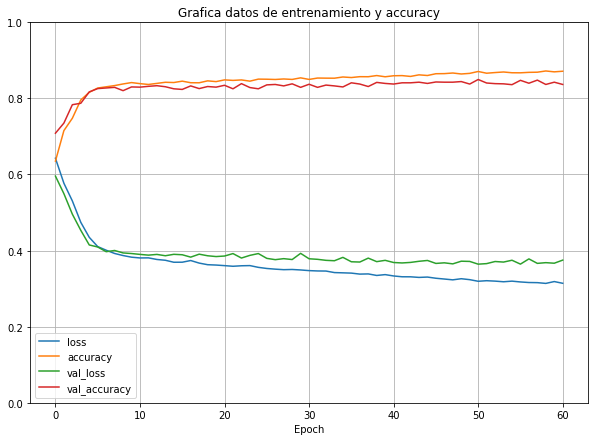

In [33]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel("Epoch")
plt.title("Grafica datos de entrenamiento y accuracy")
plt.show()

In [32]:
#Evaluacion del modelo

resultados = modelo.evaluate(X_test, y_test)
print("Accuracy del modelo entrenado: ", round(resultados[1]*100, 2), "%")

1842/1842 [==============================] - 0s 29us/sample - loss: 0.3469 - accuracy: 0.8561
Accuracy del modelo entrenado:  85.61 %


## Conclusiones

Con el modelo propuesto se logra tener un 85.61% de accuracy en las predicciones del modelo, lo cual es aceptable, considerando que la profundidad de la red neuronal no fue demasiada, lo que se ejemplifica si consideramos que el accuracy del modelo durante el entrenamiento es del 87.14%, se puede indicar entonces, que el modelo no sufrió de overfitting ni underfitting.

## Referencias del dataset

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014